# Multi-Complex Comparison and Analysis with abagpdb

This notebook demonstrates how to **compare multiple protein structures** systematically. This is essential for:

-  **Wild-type vs Mutant Comparison** - Understand mutation effects
-  **Drug Discovery** - Compare different bound states
-  **Protein Engineering** - Evaluate design variants
-  **Conformational Analysis** - Compare different states
-  **High-throughput Analysis** - Screen large libraries

## What We'll Compare:

In this example, we'll analyze the **5GGS antibody-antigen complex**:
- **Wild-type (WT)**: Original structure (5GGS_wt.pdb)
- **Mutant**: H100Y mutation in heavy chain (212__5GGS__H_100_Y_H.pdb)

## Features Compared:

1. **SASA (Surface Accessibility)** - Burial and exposure changes
2. **Interface Analysis** - Contact counts and residues
3. **Molecular Interactions** - H-bonds, salt bridges, hydrophobic contacts
4. **Van der Waals Energies** - Binding energies
5. **Residue-level Features** - Comprehensive fingerprints
6. **Statistical Comparisons** - Identify significant differences

---

## 1. Setup and Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# Import abagpdb modules
from abagpdb.pdbparser import parse_pdb
from abagpdb.multicomplex.multi_analysis import MultiComplexAnalyzer, AnalysisConfig
from abagpdb.residue_features import (
    extract_residue_features,
    features_to_dataframe,
    identify_hotspots
)

## 2. Load Multiple Structures

We'll use the `MultiComplexAnalyzer` to load and manage multiple PDB files.

In [3]:
# Define structures to compare
structures = [
    ("Wild-Type", "5GGS_wt.pdb"),
    ("H100Y_Mutant", "212__5GGS__H_100_Y_H.pdb")
]

print("=" * 70)
print("MULTI-COMPLEX COMPARISON SETUP".center(70))
print("=" * 70)
print(f"\nStructures to analyze:")
for name, filepath in structures:
    print(f"  • {name:20s} → {filepath}")
print("=" * 70)

                    MULTI-COMPLEX COMPARISON SETUP                    

Structures to analyze:
  • Wild-Type            → 5GGS_wt.pdb
  • H100Y_Mutant         → 212__5GGS__H_100_Y_H.pdb


In [4]:
# Initialize multi-complex analyzer
analyzer = MultiComplexAnalyzer(structures)

# Set reference (wild-type)
analyzer.set_reference("Wild-Type")


Loading 2 structures...
  ✓ Loaded Wild-Type
  ✓ Loaded H100Y_Mutant
Reference set to: Wild-Type


## 3. Configure Analysis

Select which analyses to run using `AnalysisConfig`.

In [5]:
# Configure which analyses to run
config = AnalysisConfig(
    calculate_sasa=True,          # Surface accessibility
    calculate_contacts=True,       # Molecular interactions
    calculate_interface=True,      # Interface residues
    calculate_vdw=True,            # Van der Waals energies
    
    # Advanced options
    sasa_probe_radius=1.4,
    contact_distance=5.0,
    interface_distance=5.0,
    vdw_cutoff=5.0
)

print("\nAnalysis Configuration:")
print(f"  SASA:              {config.calculate_sasa}")
print(f"  Contacts:          {config.calculate_contacts}")
print(f"  Interface:         {config.calculate_interface}")
print(f"  Van der Waals:     {config.calculate_vdw}")


Analysis Configuration:
  SASA:              True
  Contacts:          True
  Interface:         True
  Van der Waals:     True


## 4. Run Multi-Complex Analysis

Execute all selected analyses on all structures.

In [6]:
# Run analysis
results = analyzer.run_analysis(config)


STARTING MULTI-COMPLEX ANALYSIS
Analyses enabled: SASA, Contacts, Interface, VDW
Processing 2 structures...

Analyzing: Wild-Type
----------------------------------------
  → Calculating SASA...
     ✓ SASA calculated (549 residues)
  → Calculating contacts...
     ✓ Contacts calculated (91 total)
  → Calculating interface...
     ✓ Interface calculated (663 contacts)
  → Calculating VDW energies...
     ✓ VDW calculated (549 residues, total: -168.56 kcal/mol)

Analyzing: H100Y_Mutant
----------------------------------------
  → Calculating SASA...
     ✓ SASA calculated (549 residues)
  → Calculating contacts...
     ✓ Contacts calculated (98 total)
  → Calculating interface...
     ✓ Interface calculated (674 contacts)
  → Calculating VDW energies...
     ✓ VDW calculated (549 residues, total: -192.10 kcal/mol)

ANALYSIS COMPLETE


## 5. Summary Statistics Comparison

In [7]:
# Extract summary statistics
summary_data = []

for name, complex_data in results.items():
    row = {'Structure': name}
    row.update(complex_data.summary)
    summary_data.append(row)

df_summary = pd.DataFrame(summary_data)

print("=" * 100)
print("SUMMARY STATISTICS COMPARISON".center(100))
print("=" * 100)
print(df_summary.to_string(index=False))
print("=" * 100)

                                   SUMMARY STATISTICS COMPARISON                                    
   Structure  total_buried_sasa  num_residues_with_sasa  contacts_HYDROGEN_BOND  contacts_SALT_BRIDGE  contacts_HYDROPHOBIC  total_contacts  interface_residues  buried_surface_area  total_vdw_energy  favorable_vdw_energy  num_residues_with_vdw
   Wild-Type                  0                     549                      19                     7                    65              91                 663                  0.0       -168.555333           -170.888821                    549
H100Y_Mutant                  0                     549                      27                     9                    62              98                 674                  0.0       -192.101706           -192.101706                    549


In [8]:
# Display as styled DataFrame
df_summary

,Structure,total_buried_sasa,num_residues_with_sasa,contacts_HYDROGEN_BOND,contacts_SALT_BRIDGE,contacts_HYDROPHOBIC,total_contacts,interface_residues,buried_surface_area,total_vdw_energy,favorable_vdw_energy,num_residues_with_vdw
0,Wild-Type,0,549,19,7,65,91,663,0.0,-168.555333,-170.888821,549
1,H100Y_Mutant,0,549,27,9,62,98,674,0.0,-192.101706,-192.101706,549


## 6. Visualize Summary Comparisons

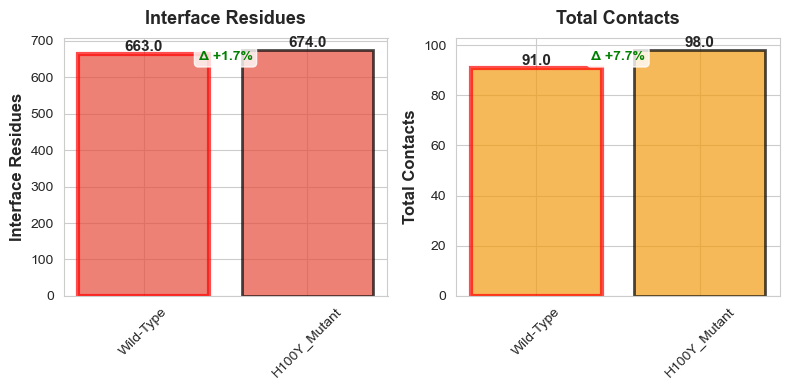

In [12]:
# Create comparison visualizations
metrics = [
    # ('total_buried_sasa', 'Total Buried SASA (Ų)', '#3498db'),
    ('interface_residues', 'Interface Residues', '#e74c3c'),
    ('total_contacts', 'Total Contacts', '#f39c12'),
]

# Filter to available metrics
available_metrics = [(col, label, color) for col, label, color in metrics if col in df_summary.columns]

if available_metrics:
    fig, axes = plt.subplots(1, len(available_metrics), figsize=(4*len(available_metrics), 4))
    
    if len(available_metrics) == 1:
        axes = [axes]
    
    for ax, (metric, label, color) in zip(axes, available_metrics):
        values = df_summary[metric].values
        names = df_summary['Structure'].values
        
        bars = ax.bar(names, values, color=color, edgecolor='black', linewidth=2, alpha=0.7)
        
        # Highlight reference (WT)
        bars[0].set_edgecolor('red')
        bars[0].set_linewidth(3)
        
        ax.set_ylabel(label, fontsize=12, fontweight='bold')
        ax.set_title(label, fontsize=13, fontweight='bold', pad=10)
        ax.tick_params(axis='x', rotation=45)
        
        # Add value labels
        for bar, val in zip(bars, values):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{val:.1f}', ha='center', va='bottom', 
                   fontsize=11, fontweight='bold')
        
        # Calculate percent difference
        if len(values) > 1 and values[0] != 0:
            pct_diff = ((values[1] - values[0]) / values[0]) * 100
            color_diff = 'green' if pct_diff > 0 else 'red'
            ax.text(0.5, 0.95, f'Δ {pct_diff:+.1f}%', 
                   transform=ax.transAxes, ha='center', va='top',
                   fontsize=10, fontweight='bold', color=color_diff,
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()
else:
    print("No metrics available for visualization")

## 7. Contact Analysis Comparison

Compare molecular interactions between structures.

In [13]:
# Extract contact information
contact_comparison = []

for name, complex_data in results.items():
    row = {'Structure': name}
    
    # Extract contact counts by type
    for key, value in complex_data.summary.items():
        if key.startswith('contacts_'):
            contact_type = key.replace('contacts_', '')
            row[contact_type] = value
    
    contact_comparison.append(row)

df_contacts = pd.DataFrame(contact_comparison)

print("=" * 80)
print("MOLECULAR INTERACTIONS COMPARISON".center(80))
print("=" * 80)
print(df_contacts.to_string(index=False))
print("=" * 80)

                       MOLECULAR INTERACTIONS COMPARISON                        
   Structure  HYDROGEN_BOND  SALT_BRIDGE  HYDROPHOBIC
   Wild-Type             19            7           65
H100Y_Mutant             27            9           62


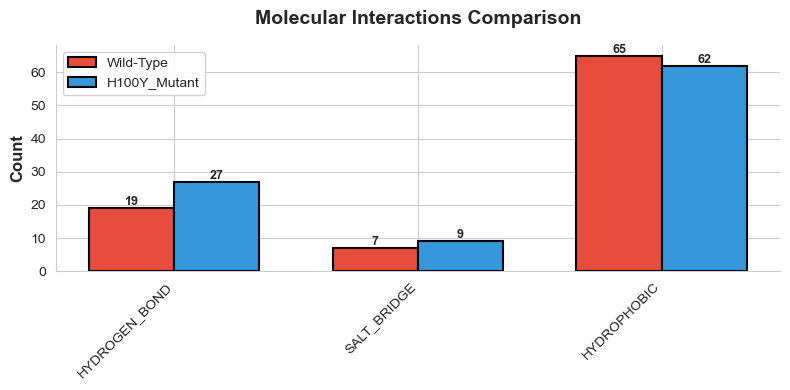

In [16]:
# Visualize contact types
if len(df_contacts.columns) > 1:
    # Prepare data for grouped bar chart
    contact_types = [col for col in df_contacts.columns if col != 'Structure']
    
    if contact_types:
        fig, ax = plt.subplots(figsize=(8, 4))
        
        x = np.arange(len(contact_types))
        width = 0.35
        
        structures = df_contacts['Structure'].values
        colors = ['#e74c3c', '#3498db', '#f39c12', '#9b59b6']
        
        for i, struct in enumerate(structures):
            values = [df_contacts.loc[i, ct] if ct in df_contacts.columns else 0 
                     for ct in contact_types]
            offset = width * (i - len(structures)/2 + 0.5)
            bars = ax.bar(x + offset, values, width, label=struct, 
                         color=colors[i % len(colors)], edgecolor='black', linewidth=1.5)
            
            # Add value labels
            for bar, val in zip(bars, values):
                height = bar.get_height()
                if height > 0:
                    ax.text(bar.get_x() + bar.get_width()/2., height,
                           f'{int(val)}', ha='center', va='bottom', 
                           fontsize=9, fontweight='bold')
        
        ax.set_ylabel('Count', fontsize=12, fontweight='bold')
        ax.set_title('Molecular Interactions Comparison', fontsize=14, fontweight='bold', pad=15)
        ax.set_xticks(x)
        ax.set_xticklabels(contact_types, rotation=45, ha='right')
        ax.legend(loc='best', framealpha=0.9)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        plt.tight_layout()
        plt.show()
else:
    print("No contact data available")

## 8. Detailed Residue-Level Comparison

Extract comprehensive features for both structures and compare at residue level.

In [17]:
# Extract residue features for both structures
print("\nExtracting detailed residue features...\n")

residue_features = {}

for name, complex_data in results.items():
    print(f"Processing {name}...")
    
    # Get chain information
    cx = complex_data.structure
    chain_ids = list(cx.chains.keys())
    
    # Assume first chain is one group, rest are another
    if len(chain_ids) >= 2:
        selection_A = chain_ids[0]
        selection_B = chain_ids[1:]
    else:
        selection_A = chain_ids
        selection_B = None
    
    # Extract features
    features = extract_residue_features(
        cx=cx,
        selection_A=selection_A,
        selection_B=selection_B,
        interface_cutoff=5.0,
        compute_sasa=True,
        compute_geometry=True,
        compute_vdw=True,
        verbose=False
    )
    
    # Convert to DataFrame
    df = features_to_dataframe(features)
    residue_features[name] = df
    
    print(f"  ✓ Extracted {len(df)} residues\n")


Extracting detailed residue features...

Processing Wild-Type...
  ✓ Extracted 549 residues

Processing H100Y_Mutant...
  ✓ Extracted 549 residues



In [18]:
# Display basic info
for name, df in residue_features.items():
    print(f"{name}:")
    print(f"  Total residues:      {len(df)}")
    print(f"  Interface residues:  {df['is_interface'].sum()}")
    print(f"  Hotspots:            {((df['is_interface']) & (df['total_interactions'] >= 3)).sum()}")
    print()

Wild-Type:
  Total residues:      549
  Interface residues:  59
  Hotspots:            20

H100Y_Mutant:
  Total residues:      549
  Interface residues:  59
  Hotspots:            17



## 9. Compare Interface Residues

Identify which interface residues differ between structures.

In [19]:
# Extract interface residues
wt_interface = residue_features["Wild-Type"][residue_features["Wild-Type"]['is_interface']]
mut_interface = residue_features["H100Y_Mutant"][residue_features["H100Y_Mutant"]['is_interface']]

print("=" * 80)
print("INTERFACE RESIDUE COMPARISON".center(80))
print("=" * 80)

# Get residue IDs
wt_interface_ids = set(wt_interface['residue_id'])
mut_interface_ids = set(mut_interface['residue_id'])

# Find differences
common_interface = wt_interface_ids & mut_interface_ids
wt_only = wt_interface_ids - mut_interface_ids
mut_only = mut_interface_ids - wt_interface_ids

print(f"\nInterface Residues:")
print(f"  Wild-Type:           {len(wt_interface_ids)} residues")
print(f"  H100Y Mutant:        {len(mut_interface_ids)} residues")
print(f"  Common:              {len(common_interface)} residues")
print(f"  WT-specific:         {len(wt_only)} residues")
print(f"  Mutant-specific:     {len(mut_only)} residues")

if wt_only:
    print(f"\n  WT-only interface residues:")
    for res_id in sorted(wt_only):
        print(f"    - {res_id}")

if mut_only:
    print(f"\n  Mutant-only interface residues:")
    for res_id in sorted(mut_only):
        print(f"    - {res_id}")

print("=" * 80)

                          INTERFACE RESIDUE COMPARISON                          

Interface Residues:
  Wild-Type:           59 residues
  H100Y Mutant:        59 residues
  Common:              56 residues
  WT-specific:         3 residues
  Mutant-specific:     3 residues

  WT-only interface residues:
    - ASP L:97
    - THR A:46
    - TYR H:100

  Mutant-only interface residues:
    - ASN H:30
    - HIS H:100
    - THR H:27


## 10. Compare Interaction Profiles

For common interface residues, compare their interaction counts.

In [21]:
# Compare interactions for common interface residues
if common_interface:
    comparison_data = []
    
    for res_id in sorted(common_interface):
        wt_row = wt_interface[wt_interface['residue_id'] == res_id].iloc[0]
        mut_row = mut_interface[mut_interface['residue_id'] == res_id].iloc[0]
        
        comparison_data.append({
            'Residue': res_id,
            'WT_Total': wt_row['total_interactions'],
            'Mut_Total': mut_row['total_interactions'],
            'Δ_Total': mut_row['total_interactions'] - wt_row['total_interactions'],
            'WT_HBonds': wt_row['num_hbonds'],
            'Mut_HBonds': mut_row['num_hbonds'],
            'Δ_HBonds': mut_row['num_hbonds'] - wt_row['num_hbonds'],
            'WT_SaltBr': wt_row['num_salt_bridges'],
            'Mut_SaltBr': mut_row['num_salt_bridges'],
            'Δ_SaltBr': mut_row['num_salt_bridges'] - wt_row['num_salt_bridges'],
        })
    
    df_comparison = pd.DataFrame(comparison_data)
    
    # Filter to significant changes
    df_changes = df_comparison[df_comparison['Δ_Total'] != 0].sort_values('Δ_Total', key=abs, ascending=False)
    
    if len(df_changes) > 0:
        print("\n" + "=" * 100)
        print("RESIDUES WITH CHANGED INTERACTIONS".center(100))
        print("=" * 100)
        print(df_changes.head(20).to_string(index=False))
        print("=" * 100)
    else:
        print("\nNo significant changes in interactions detected.")
else:
    print("No common interface residues to compare")


                                 RESIDUES WITH CHANGED INTERACTIONS                                 
  Residue  WT_Total  Mut_Total  Δ_Total  WT_HBonds  Mut_HBonds  Δ_HBonds  WT_SaltBr  Mut_SaltBr  Δ_SaltBr
 TYR H:32         8         13        5          1           3         2          0           0         0
 TYR A:38         3          0       -3          0           0         0          0           0         0
 PRO A:59        14         17        3          0           0         0          0           0         0
 PRO A:53        14         11       -3          0           0         0          0           0         0
 GLY A:60         0          2        2          0           2         2          0           0         0
 GLN A:45         0          2        2          0           2         2          0           0         0
 THR H:57         0          2        2          0           2         2          0           0         0
 VAL A:34        14         16        2          0

## 11. Visualize Interaction Changes

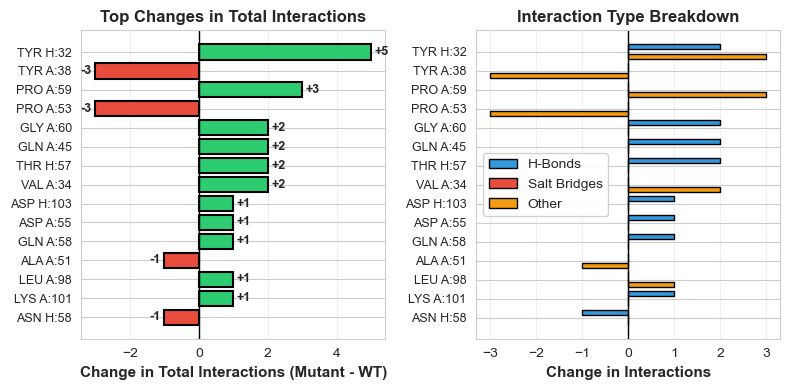

In [23]:
# Visualize top changes
if 'df_changes' in locals() and len(df_changes) > 0:
    # Top 15 most changed residues
    top_changes = df_changes.head(15)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
    
    # 1. Total interaction changes
    colors = ['#e74c3c' if x < 0 else '#2ecc71' for x in top_changes['Δ_Total']]
    bars = ax1.barh(range(len(top_changes)), top_changes['Δ_Total'], 
                    color=colors, edgecolor='black', linewidth=1.5)
    ax1.set_yticks(range(len(top_changes)))
    ax1.set_yticklabels(top_changes['Residue'], fontsize=9)
    ax1.set_xlabel('Change in Total Interactions (Mutant - WT)', fontsize=11, fontweight='bold')
    ax1.set_title('Top Changes in Total Interactions', fontsize=12, fontweight='bold')
    ax1.axvline(0, color='black', linestyle='-', linewidth=1)
    ax1.invert_yaxis()
    ax1.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, top_changes['Δ_Total'])):
        x_pos = val + (0.1 if val > 0 else -0.1)
        ha = 'left' if val > 0 else 'right'
        ax1.text(x_pos, bar.get_y() + bar.get_height()/2, f'{int(val):+d}',
                ha=ha, va='center', fontsize=9, fontweight='bold')
    
    # 2. Breakdown by interaction type
    x = np.arange(len(top_changes))
    width = 0.25
    
    ax2.barh(x - width, top_changes['Δ_HBonds'], width, 
             label='H-Bonds', color='#3498db', edgecolor='black', linewidth=1)
    ax2.barh(x, top_changes['Δ_SaltBr'], width,
             label='Salt Bridges', color='#e74c3c', edgecolor='black', linewidth=1)
    ax2.barh(x + width, top_changes['Δ_Total'] - top_changes['Δ_HBonds'] - top_changes['Δ_SaltBr'], 
             width, label='Other', color='#f39c12', edgecolor='black', linewidth=1)
    
    ax2.set_yticks(x)
    ax2.set_yticklabels(top_changes['Residue'], fontsize=9)
    ax2.set_xlabel('Change in Interactions', fontsize=11, fontweight='bold')
    ax2.set_title('Interaction Type Breakdown', fontsize=12, fontweight='bold')
    ax2.axvline(0, color='black', linestyle='-', linewidth=1)
    ax2.legend(loc='best', framealpha=0.9)
    ax2.invert_yaxis()
    ax2.grid(axis='x', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No interaction changes to visualize")

## 12. VdW Energy Comparison

Compare Van der Waals interaction energies.

In [25]:
# Extract VdW energies
vdw_comparison = []

for name, df in residue_features.items():
    df_vdw = df.dropna(subset=['vdw_energy'])
    
    if len(df_vdw) > 0:
        total_vdw = df_vdw['vdw_energy'].sum()
        mean_vdw = df_vdw['vdw_energy'].mean()
        min_vdw = df_vdw['vdw_energy'].min()
        
        vdw_comparison.append({
            'Structure': name,
            'Total_VdW': total_vdw,
            'Mean_VdW': mean_vdw,
            'Min_VdW': min_vdw,
            'Num_Residues': len(df_vdw)
        })

if vdw_comparison:
    df_vdw_comp = pd.DataFrame(vdw_comparison)
    
    print("=" * 80)
    print("VAN DER WAALS ENERGY COMPARISON".center(80))
    print("=" * 80)
    print(df_vdw_comp.to_string(index=False))
    print("=" * 80)
    
    # Calculate difference
    if len(df_vdw_comp) == 2:
        delta_total = df_vdw_comp.iloc[1]['Total_VdW'] - df_vdw_comp.iloc[0]['Total_VdW']
        print(f"\nΔ Total VdW Energy: {delta_total:+.2f} kcal/mol")
        
        if delta_total < 0:
            print("  → Mutant has MORE FAVORABLE binding energy")
        else:
            print("  → Mutant has LESS FAVORABLE binding energy")
else:
    print("No VdW energy data available")

                        VAN DER WAALS ENERGY COMPARISON                         
   Structure  Total_VdW  Mean_VdW   Min_VdW  Num_Residues
   Wild-Type -65.469087 -0.119252 -5.918340           549
H100Y_Mutant -76.347909 -0.139067 -5.519487           549

Δ Total VdW Energy: -10.88 kcal/mol
  → Mutant has MORE FAVORABLE binding energy


## 13. SASA Comparison

Compare burial patterns between structures.

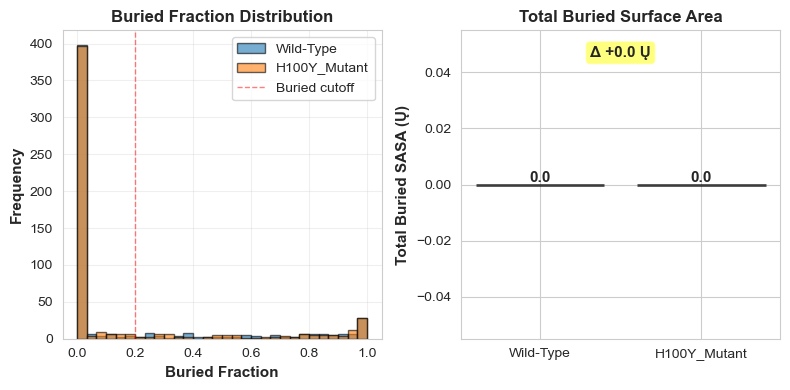

In [27]:
# Compare SASA distributions
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# 1. Buried fraction distribution
for name, df in residue_features.items():
    df_sasa = df.dropna(subset=['buried_fraction'])
    if len(df_sasa) > 0:
        axes[0].hist(df_sasa['buried_fraction'], bins=30, alpha=0.6, 
                    label=name, edgecolor='black', linewidth=1)

axes[0].set_xlabel('Buried Fraction', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0].set_title('Buried Fraction Distribution', fontsize=12, fontweight='bold')
axes[0].axvline(0.2, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Buried cutoff')
axes[0].legend()
axes[0].grid(alpha=0.3)

# 2. Total buried SASA comparison
sasa_totals = []
names = []

for name, df in residue_features.items():
    df_sasa = df.dropna(subset=['delta_sasa'])
    if len(df_sasa) > 0:
        total_buried = df_sasa[df_sasa['delta_sasa'] < 0]['delta_sasa'].abs().sum()
        sasa_totals.append(total_buried)
        names.append(name)

if sasa_totals:
    colors_bar = ['#e74c3c', '#3498db']
    bars = axes[1].bar(names, sasa_totals, color=colors_bar[:len(names)], 
                       edgecolor='black', linewidth=2, alpha=0.7)
    axes[1].set_ylabel('Total Buried SASA (Ų)', fontsize=11, fontweight='bold')
    axes[1].set_title('Total Buried Surface Area', fontsize=12, fontweight='bold')
    
    # Add value labels
    for bar, val in zip(bars, sasa_totals):
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{val:.1f}', ha='center', va='bottom', 
                    fontsize=11, fontweight='bold')
    
    # Show difference
    if len(sasa_totals) == 2:
        delta_sasa = sasa_totals[1] - sasa_totals[0]
        axes[1].text(0.5, 0.95, f'Δ {delta_sasa:+.1f} Ų',
                    transform=axes[1].transAxes, ha='center', va='top',
                    fontsize=11, fontweight='bold',
                    bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.tight_layout()
plt.show()

## 14. Export Comparison Results

In [ ]:
# Export summary comparison
df_summary.to_csv("multi_complex_summary.csv", index=False)
print("✓ Exported summary to: multi_complex_summary.csv")

# Export contact comparison
if 'df_contacts' in locals():
    df_contacts.to_csv("multi_complex_contacts.csv", index=False)
    print("✓ Exported contacts to: multi_complex_contacts.csv")

# Export interaction changes
if 'df_comparison' in locals():
    df_comparison.to_csv("multi_complex_interaction_changes.csv", index=False)
    print("✓ Exported interaction changes to: multi_complex_interaction_changes.csv")

# Export individual residue features
for name, df in residue_features.items():
    filename = f"residue_features_{name.replace(' ', '_').replace('-', '_')}.csv"
    df.to_csv(filename, index=False)
    print(f"✓ Exported {name} features to: {filename}")

## 15. Statistical Summary

Generate a comprehensive statistical report.

In [29]:
print("\n" + "=" * 100)
print("MULTI-COMPLEX COMPARISON SUMMARY".center(100))
print("=" * 100)

print("\n📊 Overall Statistics:")
print(f"  Structures compared:     {len(results)}")
print(f"  Reference (WT):          {analyzer.wt_name}")

print("\n🔬 Analysis Modules Run:")
print(f"  SASA:                    {'✓' if config.calculate_sasa else '✗'}")
print(f"  Contacts:                {'✓' if config.calculate_contacts else '✗'}")
print(f"  Interface:               {'✓' if config.calculate_interface else '✗'}")
print(f"  Van der Waals:           {'✓' if config.calculate_vdw else '✗'}")

print("\n📈 Key Findings:")

if 'df_changes' in locals() and len(df_changes) > 0:
    print(f"  Residues with changed interactions: {len(df_changes)}")
    print(f"  Largest increase:        {df_changes['Δ_Total'].max():+d} interactions")
    print(f"  Largest decrease:        {df_changes['Δ_Total'].min():+d} interactions")

if wt_only or mut_only:
    print(f"  Interface composition changes:")
    print(f"    Lost in mutant:        {len(wt_only)} residues")
    print(f"    Gained in mutant:      {len(mut_only)} residues")

if vdw_comparison and len(vdw_comparison) == 2:
    delta_vdw = df_vdw_comp.iloc[1]['Total_VdW'] - df_vdw_comp.iloc[0]['Total_VdW']
    print(f"  VdW energy change:       {delta_vdw:+.2f} kcal/mol")


print("\n" + "=" * 100)
print("ANALYSIS COMPLETE".center(100))
print("=" * 100)


                                  MULTI-COMPLEX COMPARISON SUMMARY                                  

📊 Overall Statistics:
  Structures compared:     2
  Reference (WT):          Wild-Type

🔬 Analysis Modules Run:
  SASA:                    ✓
  Contacts:                ✓
  Interface:               ✓
  Van der Waals:           ✓

📈 Key Findings:
  Residues with changed interactions: 23
  Largest increase:        +5 interactions
  Largest decrease:        -3 interactions
  Interface composition changes:
    Lost in mutant:        3 residues
    Gained in mutant:      3 residues
  VdW energy change:       -10.88 kcal/mol

                                         ANALYSIS COMPLETE                                          


## END